# Kpop Data Analysis
## -- by Charlie Chengrui Zheng
Kpop refers to the music genre and its idol industry originated in South Korea. Unlike other music genres having blurry origin and developed gradually in today's form, Kpop has an actual birthday when **Seo Taiji and Boys** debuted on 1992-03-23. After less than 30 years of development, Kpop obtains worldwide popularity among youth today. I gathered data of Kpop from 1992-03-23 (the birthday of Kpop) to 2021-01-11 including information of all major Kpop idols from [K-Pop Database](https://dbkpop.com/). In this article, I will investigate Kpop by analyzing the 4 tables in this dataset:
<ol>
    <li>all Kpop idols</li>
    <li>all Kpop boy groups</li>
    <li>all Kpop girl groups</li>
    <li>all Kpop music videos</li>
</ol>
Music videos are great metrics to analyze because they are usually made for Kpop singers' hit songs, also known as 'debut' and 'comeback'. Note that the information of Seo Taiji and Boys are not recorded in first 2 tables because whether they were too different from all other Kpop idols.

## General
By 2021-01-11, when the data was collected, 4146 music videos were produced. There are 1435 Kpop idols in total. It is quite stunning that Kpop has been developing for less than 30 years, but has already attracted such a great number of artists to join this industry. Kpop has always been famous for group activities. Among all idols, 1318 of them (92%) are or has been a member of a Kpop group, only 117 of them (8%) has always been soloists. 48% of them are female. 52% of them are male. There has been 176 male groups and also 176 female groups. 134 boy groups and 94 girl groups are active now. Here is a small peek of the table of all idols:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def year_clean(df, col1_name, col2_name):
    year_cleaned = []
    for _, row in df.iterrows():
        if row[col1_name][-2] in ['0','1','2']:
            year_cleaned.append(2000 + int(row[col1_name][-2:]))
        else:
            year_cleaned.append(1900 + int(row[col1_name][-2:]))
    df[col2_name] = year_cleaned
    return df

# creating dataframes and data cleaning
idols = year_clean(pd.read_csv('kpop_idols.csv'), 'Date of Birth', 'Birth Year')
boys = pd.read_csv('kpop_idols_boy_groups.csv')
girls = pd.read_csv('kpop_idols_girl_groups.csv')
all_groups = year_clean(pd.concat([boys, girls]),'Debut','Debut Year')

# calculating ages of idols
age = [2021-row['Birth Year'] for _, row in idols.iterrows()]
idols['Age'] = age
print(f'{idols.count().Group} artist are or have been in Kpop group')
boy_active = boys.groupby('Active').count()['Name'].loc['Yes']
girl_active = girls.groupby('Active').count()['Name'].loc['Yes']
print(f'{boy_active} boy groups are active')
print(f'{girl_active} girl groups are active')
idols.head(5)

1318 artist are or have been in Kpop group
134 boy groups are active
94 girl groups are active


,Stage Name,Full Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender,Birth Year,Age
0,A.M,Seong Hyunwoo,12/31/96,Limitless,South Korea,NaN,NaN,M,1996,25
1,Ace,Jang Wooyoung,8/28/92,VAV,South Korea,NaN,NaN,M,1992,29
2,Aeji,Kwon Aeji,10/25/99,Hashtag,South Korea,Daegu,NaN,F,1999,22
3,AhIn,Lee Ahin,9/27/99,MOMOLAND,South Korea,Wonju,NaN,F,1999,22
4,Ahra,Go Ahra,2/21/01,Favorite,South Korea,Yeosu,NaN,F,2001,20


## International Artists
Kpop is well-known for its internationality, 124 idols (9%) are not from South Korea, but from 12 other countries and states. Notably, there are 42 artists from China (mainland) now. There are also 38 Japanese artists and 14 American artists (Korean-Americans are not included in this dataset).

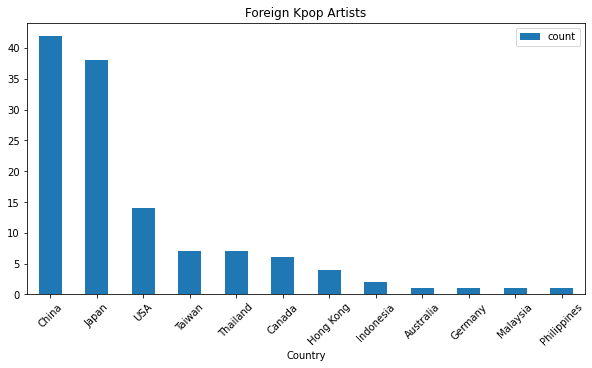

,Country,count
0,China,42
1,Japan,38
2,USA,14
3,Taiwan,7
4,Thailand,7
5,Canada,6
6,Hong Kong,4
7,Indonesia,2
8,Australia,1
9,Germany,1


In [2]:
foreign = idols.groupby('Country')['Stage Name'].count().reset_index(name='count')\
.sort_values(['count'],ascending=False).iloc[1:]
foreign.plot.bar(x='Country',title='Foreign Kpop Artists', rot=45, figsize=(10,5))
plt.show()
foreign.reset_index(drop=True, inplace=True)
foreign

## Age
Kpop Artists are famous for showing their youthful charisma. Kpop idols are generally young. The average age of all Kpop idols is 25, as for 2021.

The average age of Kpop idols is 25


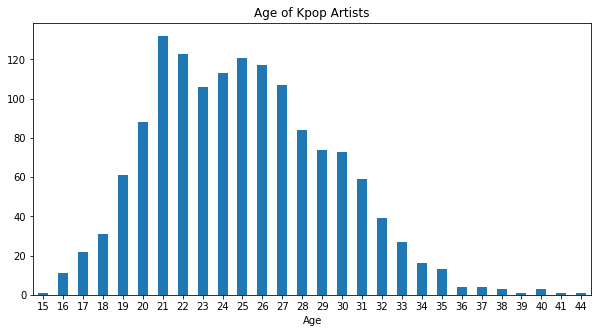

In [3]:
age = idols.groupby('Age')['Stage Name'].count()
print(f'The average age of Kpop idols is {int(np.mean(idols.Age))}')
age.plot.bar(title='Age of Kpop Artists',rot=0, figsize=(10,5))
plt.show()

On the other hand, Kpop idols usually debut in even younger age. The average age of a newly debuted Kpop group members is 19. The youngest idols, such as IZ\*ONE's Wonyoung and Shinee's Taemin, debuted are only 14 years old.

The average age of a newly debuted Kpop group is 19


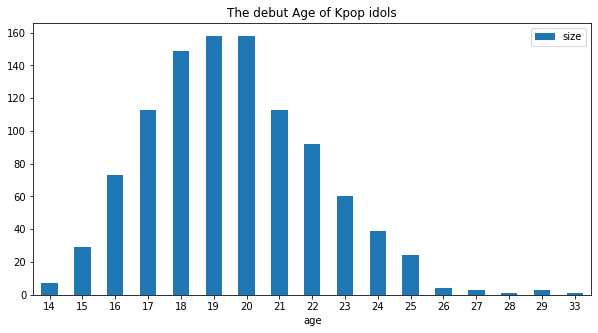

In [4]:
from collections import Counter, defaultdict
def debut_age(df):
    age = []
    checked = []
    for _, group in df.iterrows():
        for index, idol in idols.iterrows():
            if index not in checked and idol.Group == group.Name:
                checked.append(index)
                debut = group['Debut Year'] - idol['Birth Year']
                # I calculate the debut age by minus group debut year from idols' birth year
                # However, this may not work sometimes when young idols were added to the group
                # after the group already debut
                # Therefore, I set the minimum debut age as 14, which is already known
                if debut > 13:
                    age.append(debut)
    return age

debut_age_list = debut_age(all_groups)
debut_age_list.sort()
print(f'The average age of a newly debuted Kpop group is {int(np.mean(debut_age_list))}')
age_count = pd.DataFrame({'age': debut_age_list}).groupby('age', as_index=False).size()
age_count.plot.bar(x='age',y='size',title='The debut Age of Kpop idols',rot=0, figsize=(10,5))
plt.show()

## Timeline
Kpop's fast development is epitomized by the timeline of music videos by year, and the timeline of group debuts by year. Especially, Kpop groups can be divided into generations. There are lot of opinions about how to divide the generations. Here, I will be showing only one of those opinions:
<ul>
    <li>0th Generation 1992 - 1995: This was the time when <b>Seo Taiji and Boys</b> were building the fundamentals of Kpop industry. In 'Music Videos by Year', they were the only artists who were releasing music videos, about 1 or 2 every year. There were no other group debut in this era.
    <li>1st Generation 1996 - 2003: This was the time when the agency <b>SM Entertainment</b> trained their own artists and gathered them to form the first Kpop group <b>H.O.T.</b>, and kept managing their group activities. This kind system was adopted by other agencies and became the major charaterstics of Kpop industry. Kpop became popular in South Korea domestically. We can see that during late 1990s, there were several group debuts. But this number decreased in early 2000s because the 1st Generation Kpop group fell apart. Soloist activities were more popular. The exemplar groups in the 1st Generation are <b>H.O.T.</b> and <b>S.E.S.</b>
    <li>2nd Generation 2004 - 2011:This was the time when Kpop groups became popular again and expanded their markets to other Asian countries.<b>TVXQ!</b>'s debut and its great success in Korea and Japan marked the start of this generation. 2nd Generation groups also started to have foreign members onboard, starting with <b>Super Juniors</b>' Chinese member <b>Han Geng</b>. We can see from the barplots that both the numbers of group debuts and music videos began soaring from 2004. Kpop's development began skyrocketing since this generation. The exemplar groups in the 2nd Generation are <b>TVXQ!, Super Juniors, BIGBANG</b> and <b>Girls' Generation</b>.
    <li>3rd Generation 2011 - :This was the time when Kpop groups became more popular internationally. In 2012, <b>PSY's Gangnam Style</b> became a global hit. It brought light to Kpop not just in Asia, but also in Western world. 3rd Generation groups began obtaining popularity globally. They also take advantage of social networks and survival shows to promote themselves. We can see from the barplots that both the numbers of group debuts and music videos keep soaring. The examplar groups in the 3rd Generation are <b>EXO, TWICE, BLACKPINK</b> and <b>BTS</b>.
</ul>
Now, whether the 4th generation started or not is still disputed. Some opinions state that the 4th generation started in recent years. Other opinions also argue that there are already 5 generations.

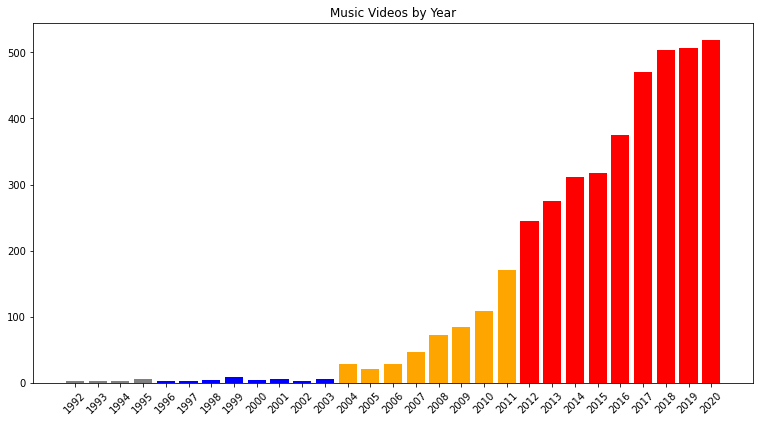

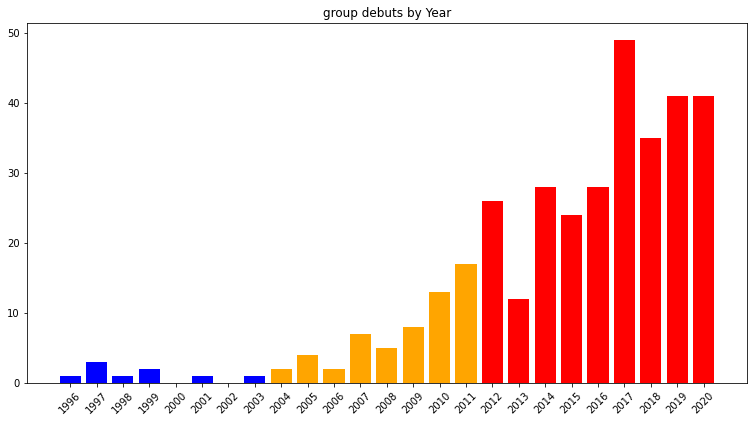

In [5]:
def timeline(df, title_name, column, include_zero):
    zero_gen = list(range(1992,1996))
    first_gen = list(range(1996,2004))
    second_gen = list(range(2004,2012))
    third_gen = list(range(2012,2021))
    
    generations = [zero_gen, first_gen, second_gen, third_gen]
    colors = ['gray','blue','orange','red']

    if include_zero == False:
        generations = generations[1:]
        colors = colors[1:]
    counters = []
    
    for years in generations:
        value_by_year = Counter()
        for _, row in df.iterrows():    
            for year in years:
                if row[column] == year:
                    value_by_year[year] += 1
        counters.append(value_by_year)   
                    
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_axes([0,0,1,1])
    all_year = []
    for gen_color, years, counter in zip(colors, generations, counters):
        ax.bar(years, [counter[year] for year in years], color=gen_color)
        all_year += years
    plt.xticks(all_year)
    plt.xticks(rotation = 45)
    plt.title(title_name)
    plt.show()

mv = year_clean(pd.read_csv('kpop_music_videos.csv'),'Date','Year')
timeline(mv, "Music Videos by Year", 'Year', True)
timeline(all_groups, "group debuts by Year", 'Debut Year', False)

## Agency
Kpop entertainment companies play significant role in this industry. These agencies recruit artists as trainees, select excellent trainees to form groups and manage their activities after they debut. Every Kpop agency manages 1.6 groups on average. Big companies like <b>SM Entertainment</b> can have up to 15 groups. Here are the 10 agencies which have most groups.

Every Kpop agency manages 1.6 groups on average


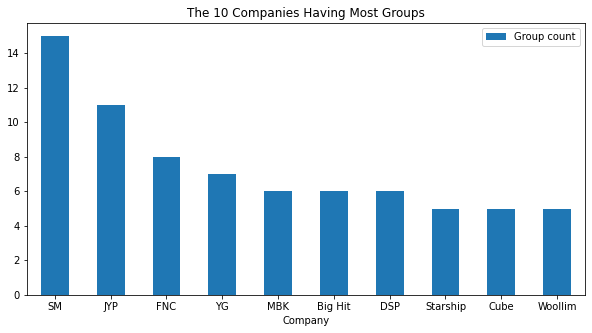

The 10 companies having most groups are:


,Company,Groups,Group count
0,SM,"[EXO, Fly to the Sky, H.O.T, NCT, SHINee, Shin...",15
1,JYP,"[2AM, 2PM, DAY6, g.o.d., GOT7, Stray Kids, 15&...",11
2,FNC,"[CNBLUE, FTISLAND, Honeyst, N.Flying, P1Harmon...",8
3,YG,"[BIGBANG, iKON, SECHKIES, Treasure, WINNER, 2N...",7
4,MBK,"[1the9, Speed, Turbo, DIA, F-ve Dolls, T-ara]",6
5,Big Hit,"[2AM, 8Eight, BTS, Homme, TXT, GLAM]",6
6,DSP,"[A-JAX, SECHKIES, SS501, April, KARA, Rainbow]",6
7,Starship,"[Boyfriend, CRAVITY, MONSTA X, SISTAR, WJSN]",5
8,Cube,"[BtoB, PENTAGON, (G)I-DLE, 4Minute, CLC]",5
9,Woollim,"[DRIPPIN, Golden Child, Infinite, Lovelyz, Roc...",5


In [6]:
agency = defaultdict(list)
for _, row in all_groups.iterrows():
    if isinstance(row.Company, str):
        for company in row.Company.split(','):
            agency[company.strip()].append(row.Name)
companies = list(agency.keys())
group_counts = [len(groups) for groups in agency.values()]
agency_df = pd.DataFrame({'Company':companies,"Groups":agency.values(),"Group count":group_counts})
avg_group = round(agency_df['Group count'].mean(),1)
print(f'Every Kpop agency manages {avg_group} groups on average')
big10 = agency_df.sort_values(by='Group count',ascending=False).head(10)
big10.plot.bar(x='Company',y='Group count',title='The 10 Companies Having Most Groups',rot=0, figsize=(10,5))
plt.show()
print(f'The 10 companies having most groups are:')
big10.reset_index(drop=True, inplace=True)
big10

## Group Members
On average, Kpop groups have 5.5 members. 5-member group is the most common form. However, maintaining the team is not easy. 90 groups, about 25%, have lost group members.

Kpop groups have 5.5 members on average
90 groups, about 25%, have lost group members


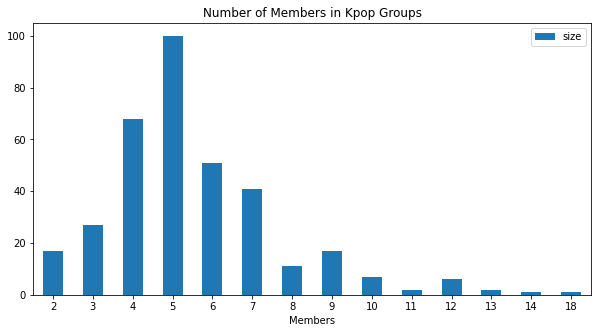

In [7]:
all_groups.astype({'Orig. Memb.': 'int32','Members': 'int32'}).dtypes
print(f'Kpop groups have {round(all_groups.Members.mean(),1)} members on average')

loss = 0
for _, row in all_groups.iterrows():
    if row['Orig. Memb.'] - row['Members'] > 0:
        loss += 1
print(f'{loss} groups, about {int(100*loss/len(all_groups))}%, have lost group members')

member_count = all_groups.groupby('Members', as_index=False).size().iloc[1:]
member_count.plot.bar(x='Members',y='size',title='Number of Members in Kpop Groups',rot=0, figsize=(10,5))
plt.show()

## Fanclub
Kpop's success largely depends on the devotion of their fans. Kpop groups are famous for making official fanclubs for their devoted fans and organize events within those fanclubs, such as <b>BTS</b>' fanclub <b>ARMY</b>. 41% of the boy groups have their fanclubs. 30% of the boy groups have their fanclubs. The data shows that boy groups gained more fans' devotion than girl groups.

In [8]:
print(f'{int(100*boys["Fanclub Name"].count()/boys.shape[0])}% of the boy groups have names for their fanclubs. {int(100*girls["Fanclub Name"].count()/girls.shape[0])}% of the boy groups have names for their fanclubs.')

36% of the boy groups have names for their fanclubs. 27% of the boy groups have names for their fanclubs.
